Valores ausentes antes da limpeza:
Produto           1
Categoria         1
Quantidade        1
Valor_unitario    1
Fornecedor        1
dtype: int64


<ipython-input-4-cefdff1bda96>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Produto'].fillna('Fichario', inplace=True)
<ipython-input-4-cefdff1bda96>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

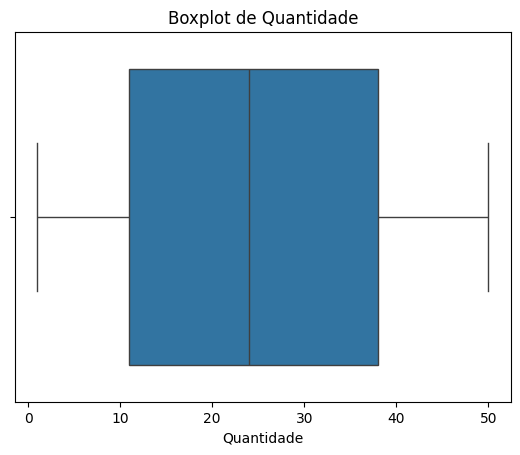

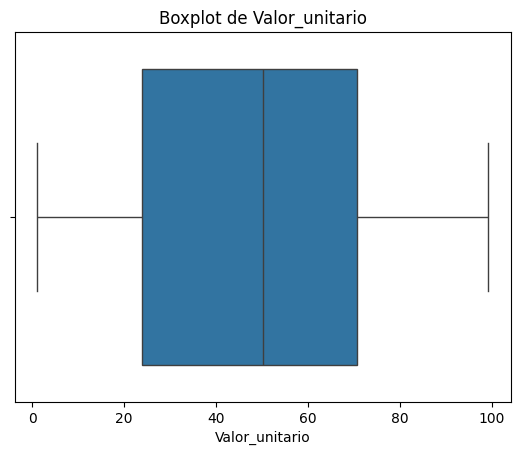

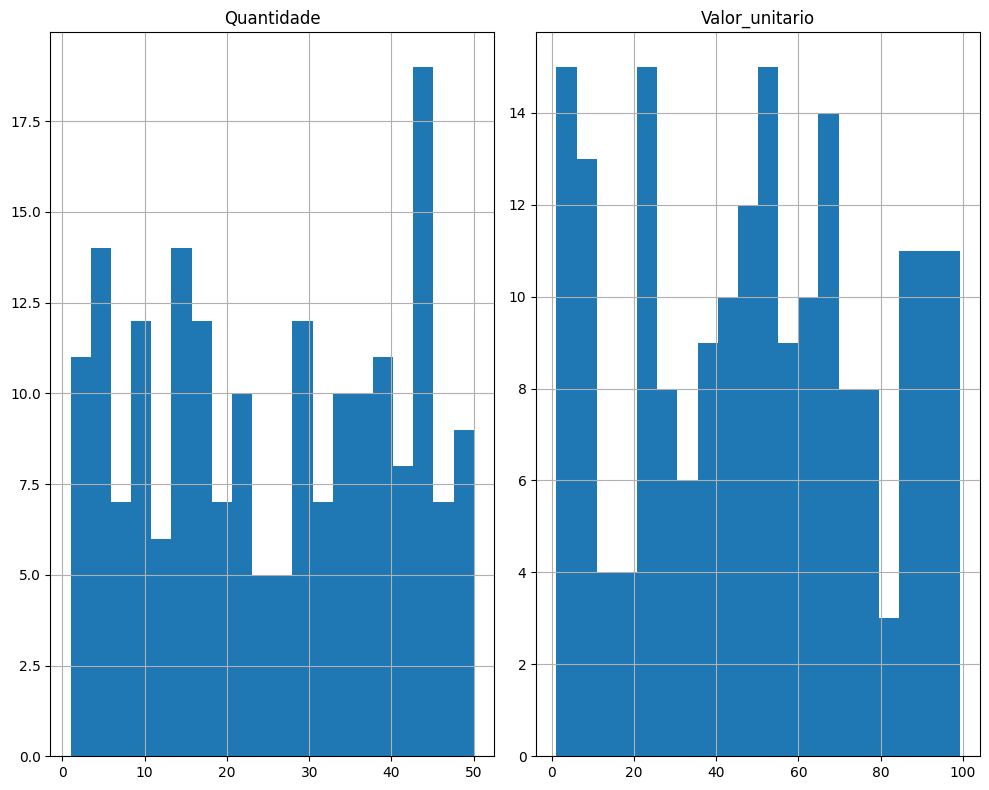

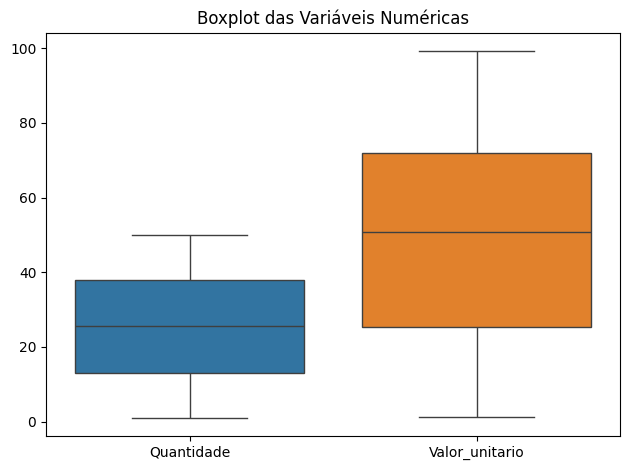


Melhores parâmetros encontrados para Regressão Logística: {'C': 10, 'max_iter': 1000, 'solver': 'liblinear'}


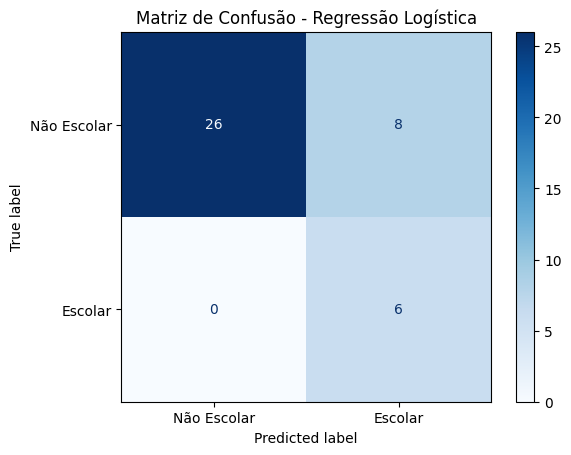

Relatório de Classificação - Regressão Logística:
              precision    recall  f1-score   support

       False       1.00      0.76      0.87        34
        True       0.43      1.00      0.60         6

    accuracy                           0.80        40
   macro avg       0.71      0.88      0.73        40
weighted avg       0.91      0.80      0.83        40


Melhores parâmetros encontrados para Random Forest: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Acurácia do modelo Random Forest: 0.88

Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

       False       0.91      0.94      0.93        34
        True       0.60      0.50      0.55         6

    accuracy                           0.88        40
   macro avg       0.76      0.72      0.74        40
weighted avg       0.87      0.88      0.87        40



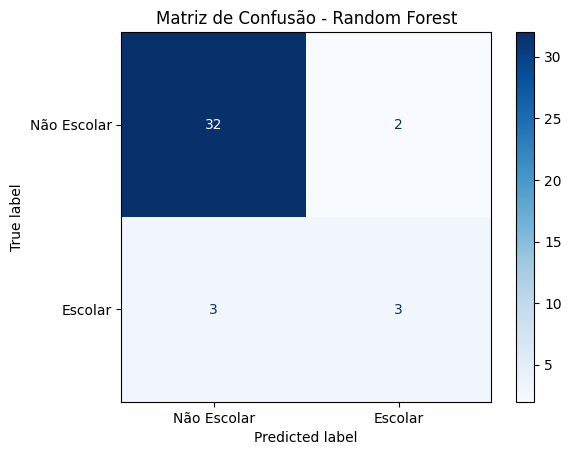

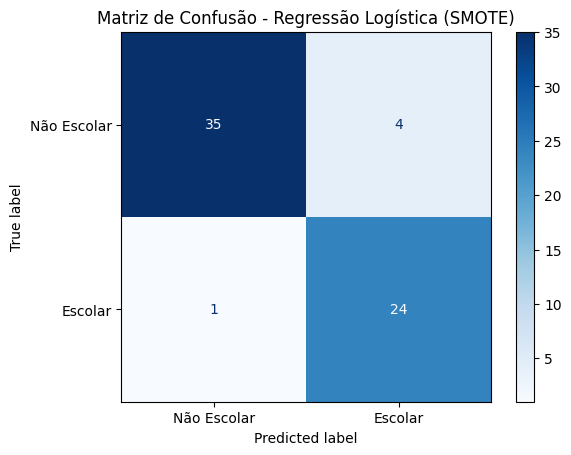

Relatório de Classificação - Regressão Logística (SMOTE):
              precision    recall  f1-score   support

       False       0.97      0.90      0.93        39
        True       0.86      0.96      0.91        25

    accuracy                           0.92        64
   macro avg       0.91      0.93      0.92        64
weighted avg       0.93      0.92      0.92        64


Regressão Linear:
R²: -0.06
RMSE: 14.72
MAE: 12.27


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


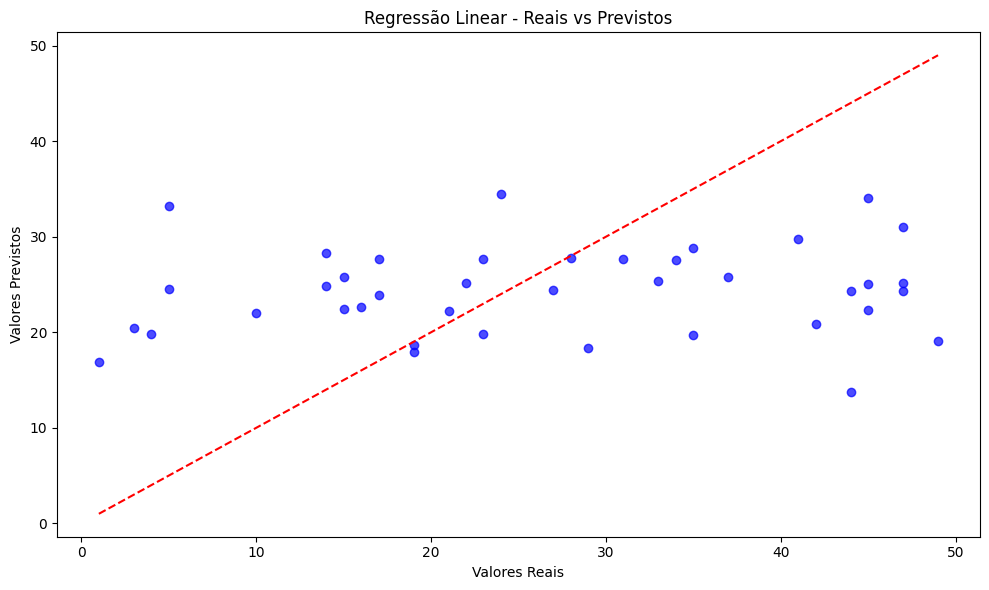


Coeficientes da Regressão Linear:
                   Variável  Coeficiente
4              Produto_Cola     5.719811
18  Fornecedor_Fornecedor D     5.712579
8          Produto_Papel A4     5.427725
19  Fornecedor_Fornecedor E     5.170863
7             Produto_Lápis     4.402252
16  Fornecedor_Fornecedor B     2.353362
17  Fornecedor_Fornecedor C     1.967330
1          Produto_Borracha     1.634214
2           Produto_Caderno     1.500477
12        Categoria_Escolar     0.839447
9             Produto_Régua     0.600175
14     Categoria_Escritório     0.588695
0            Valor_unitario     0.016744
5          Produto_Envelope    -0.014762
6          Produto_Fichario    -3.833496
11      Categoria_Decoração    -3.855571
10          Produto_Tesoura    -4.030272
3            Produto_Caneta    -4.141004
15      Categoria_Papelaria    -4.993317
13     Categoria_Escritorio   -22.316853

Acurácia média da validação cruzada - Regressão Logística: 0.83
Erro quadrático médio da validação cruz

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Carregar os dados
df = pd.read_csv("/content/dados_papelaria_inconsistentes.csv")

# **Exploração de dados e pré-processamento**
# Análise de valores ausentes e outliers
print("Valores ausentes antes da limpeza:")
print(df.isnull().sum())

# Limpeza de dados
df['Produto'].fillna('Fichario', inplace=True)
df['Categoria'].fillna('Escritorio', inplace=True)
df['Quantidade'].fillna(15, inplace=True)
df['Valor_unitario'].fillna(df['Valor_unitario'].mean(), inplace=True)
df['Fornecedor'].fillna('Fornecedor C', inplace=True)

# Verificar outliers nas variáveis numéricas com boxplot
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

# Remover duplicatas
df = df.drop_duplicates()

# Análise estatística básica
colunas_numericas = df.select_dtypes(include=['float64', 'int64'])
resumo_estatistico = colunas_numericas.describe()

# Visualizações iniciais
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

sns.boxplot(data=colunas_numericas)
plt.title('Boxplot das Variáveis Numéricas')
plt.tight_layout()
plt.show()

# Codificação de variáveis categóricas
data_encoded = pd.get_dummies(df, drop_first=True)

# Separar as variáveis independentes (X) e a variável dependente (y)
X = data_encoded.drop('Categoria_Escolar', axis=1, errors='ignore')
y = data_encoded['Categoria_Escolar']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Modelos de Classificação**
# Regressão Logística (com otimização de hiperparâmetros)
param_grid_log_reg = {
    'C': [0.1, 1, 10],  # Regularização
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}
grid_search_log_reg = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid_log_reg, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_log_reg.fit(X_train, y_train)

print(f"\nMelhores parâmetros encontrados para Regressão Logística: {grid_search_log_reg.best_params_}")

model_log_reg = grid_search_log_reg.best_estimator_
y_pred_class = model_log_reg.predict(X_test)

# Matriz de Confusão - Regressão Logística
cm_class = confusion_matrix(y_test, y_pred_class)
ConfusionMatrixDisplay(confusion_matrix=cm_class, display_labels=['Não Escolar', 'Escolar']).plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

# Relatório de Classificação
print("Relatório de Classificação - Regressão Logística:")
print(classification_report(y_test, y_pred_class))

# Random Forest Classifier (com otimização de hiperparâmetros)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print(f"\nMelhores parâmetros encontrados para Random Forest: {grid_search_rf.best_params_}")

model_rf = grid_search_rf.best_estimator_
y_pred_rf = model_rf.predict(X_test)

# Avaliar o modelo Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do modelo Random Forest: {accuracy_rf:.2f}")
print("\nRelatório de Classificação - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Matriz de Confusão - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Não Escolar', 'Escolar']).plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Random Forest")
plt.show()

# **Segunda abordagem**: Aplicando SMOTE para balancear os dados
smote = SMOTE(sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X, y)

# Dividir novamente os dados balanceados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Regressão Logística com dados balanceados
model_log_reg_balanced = LogisticRegression(max_iter=1000)
model_log_reg_balanced.fit(X_train, y_train)
y_pred_class_balanced = model_log_reg_balanced.predict(X_test)

# Matriz de Confusão - Regressão Logística com SMOTE
cm_class_balanced = confusion_matrix(y_test, y_pred_class_balanced)
ConfusionMatrixDisplay(confusion_matrix=cm_class_balanced, display_labels=['Não Escolar', 'Escolar']).plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Regressão Logística (SMOTE)")
plt.show()

# Relatório de Classificação - Regressão Logística com SMOTE
print("Relatório de Classificação - Regressão Logística (SMOTE):")
print(classification_report(y_test, y_pred_class_balanced))

# **Modelo de Regressão Linear para previsão de Quantidade**
X_reg = data_encoded.drop('Quantidade', axis=1, errors='ignore')
y_reg = data_encoded['Quantidade']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Regressão Linear
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = model_lin_reg.predict(X_test_reg)

# Avaliação do modelo de Regressão Linear
r2 = r2_score(y_test_reg, y_pred_reg)
rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
mae = mean_absolute_error(y_test_reg, y_pred_reg)

print(f"\nRegressão Linear:")
print(f"R²: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Gráfico de Reais vs Previstos para Regressão Linear
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7, color='blue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], '--', color='red')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Regressão Linear - Reais vs Previstos')
plt.tight_layout()
plt.show()

# Coeficientes da Regressão Linear
coeficientes = pd.DataFrame({
    'Variável': X_reg.columns,
    'Coeficiente': model_lin_reg.coef_
}).sort_values(by='Coeficiente', ascending=False)

print("\nCoeficientes da Regressão Linear:")
print(coeficientes)

# Validação cruzada para ambos os modelos
cv_scores_classification = cross_val_score(model_log_reg, X, y, cv=5, scoring='accuracy')
print(f"\nAcurácia média da validação cruzada - Regressão Logística: {cv_scores_classification.mean():.2f}")

cv_scores_regression = cross_val_score(model_lin_reg, X_reg, y_reg, cv=5, scoring='neg_mean_squared_error')
print(f"Erro quadrático médio da validação cruzada - Regressão Linear: {-cv_scores_regression.mean():.2f}")

# Interpretação dos resultados
print("\nInterpretação dos Resultados:")
print("Para a Regressão Logística:")
print("  - A matriz de confusão permite verificar a quantidade de classificações corretas e incorretas.")
print("  - O relatório de classificação fornece detalhes sobre a precisão, recall e F1-score.")
print("\nPara a Regressão Linear:")
print("  - O R² indica a proporção da variabilidade explicada pelo modelo.")
print("  - O RMSE e MAE são métricas que ajudam a entender a precisão das previsões.")
